In [516]:
#importing all libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree,metrics

In [6]:
#creating dataframe for team_stats
stats_df = pd.read_csv("team_stats_2003_2023.csv")

In [7]:
stats_df.head()

,year,team,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,...,rush_td,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties
0,2003,New England Patriots,14,2,0.875,348,238,110,6.9,16,...,9,3.4,91,111,998,26,27.9,11.3,-136.51,NaN
1,2003,Miami Dolphins,10,6,0.625,311,261,50,3.1,16,...,14,3.7,99,103,913,22,28.1,17.2,-177.92,NaN
2,2003,Buffalo Bills,6,10,0.375,243,279,-36,-2.3,16,...,13,3.9,96,106,891,22,21.9,17.6,-230.07,NaN
3,2003,New York Jets,6,10,0.375,283,299,-16,-1.0,16,...,8,4.0,78,69,550,15,32.4,11.8,-107.89,NaN
4,2003,Baltimore Ravens,10,6,0.625,391,281,110,6.9,16,...,18,4.8,115,126,970,23,31.8,16.6,-220.50,NaN


In [8]:
stats_df.isnull().sum()

year                      0
team                      0
wins                      0
losses                    0
win_loss_perc             0
points                    0
points_opp                0
points_diff               0
mov                     320
g                         0
total_yards               0
plays_offense             0
yds_per_play_offense      0
turnovers                 0
fumbles_lost              0
first_down                0
pass_cmp                  0
pass_att                  0
pass_yds                  0
pass_td                   0
pass_int                  0
pass_net_yds_per_att      0
pass_fd                   0
rush_att                  0
rush_yds                  0
rush_td                   0
rush_yds_per_att          0
rush_fd                   0
penalties                 0
penalties_yds             0
pen_fd                    0
score_pct                 0
turnover_pct              0
exp_pts_tot               0
ties                    352
dtype: int64

In [13]:
#dropping unnecessary columns
stats_df.drop(columns = ['year'], inplace = True)
stats_df.drop(columns = ['team'], inplace = True)
stats_df.drop(columns = ['ties'], inplace = True)
stats_df.drop(columns = ['mov'], inplace = True)

In [33]:
stats_df.head()

,wins,losses,win_loss_perc,points,points_opp,points_diff,g,total_yards,plays_offense,yds_per_play_offense,...,rush_yds,rush_td,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot
0,14,2,0.875,348,238,110,16,5039,1042,4.8,...,1607,9,3.4,91,111,998,26,27.9,11.3,-136.51
1,10,6,0.625,311,261,50,16,4609,968,4.8,...,1817,14,3.7,99,103,913,22,28.1,17.2,-177.92
2,6,10,0.375,243,279,-36,16,4348,980,4.4,...,1664,13,3.9,96,106,891,22,21.9,17.6,-230.07
3,6,10,0.375,283,299,-16,16,4951,936,5.3,...,1635,8,4.0,78,69,550,15,32.4,11.8,-107.89
4,10,6,0.625,391,281,110,16,4929,1009,4.9,...,2674,18,4.8,115,126,970,23,31.8,16.6,-220.50


In [39]:
stats_df['win_loss_perc']

0      0.875
1      0.625
2      0.375
3      0.375
4      0.625
       ...  
667    0.118
668    0.706
669    0.588
670    0.529
671    0.235
Name: win_loss_perc, Length: 672, dtype: float64

In [55]:
#getting data for new column
win_loss = []
for i in range(stats_df['win_loss_perc'].shape[0]):
    if(stats_df['win_loss_perc'].iloc[i] < .500):
        win_loss.append(0)
    else:
        win_loss.append(1)
len(win_loss)
stats_df.columns   

Index(['wins', 'losses', 'win_loss_perc', 'points', 'points_opp',
       'points_diff', 'g', 'total_yards', 'plays_offense',
       'yds_per_play_offense', 'turnovers', 'fumbles_lost', 'first_down',
       'pass_cmp', 'pass_att', 'pass_yds', 'pass_td', 'pass_int',
       'pass_net_yds_per_att', 'pass_fd', 'rush_att', 'rush_yds', 'rush_td',
       'rush_yds_per_att', 'rush_fd', 'penalties', 'penalties_yds', 'pen_fd',
       'score_pct', 'turnover_pct', 'exp_pts_tot'],
      dtype='object')

In [59]:
#adding new column to dataframe
stats_df.insert(3, "is_positive_season", win_loss)

In [61]:
stats_df.head()

,wins,losses,win_loss_perc,is_positive_season,points,points_opp,points_diff,g,total_yards,plays_offense,...,rush_yds,rush_td,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot
0,14,2,0.875,1,348,238,110,16,5039,1042,...,1607,9,3.4,91,111,998,26,27.9,11.3,-136.51
1,10,6,0.625,1,311,261,50,16,4609,968,...,1817,14,3.7,99,103,913,22,28.1,17.2,-177.92
2,6,10,0.375,0,243,279,-36,16,4348,980,...,1664,13,3.9,96,106,891,22,21.9,17.6,-230.07
3,6,10,0.375,0,283,299,-16,16,4951,936,...,1635,8,4.0,78,69,550,15,32.4,11.8,-107.89
4,10,6,0.625,1,391,281,110,16,4929,1009,...,2674,18,4.8,115,126,970,23,31.8,16.6,-220.50


<Axes: xlabel='is_positive_season'>

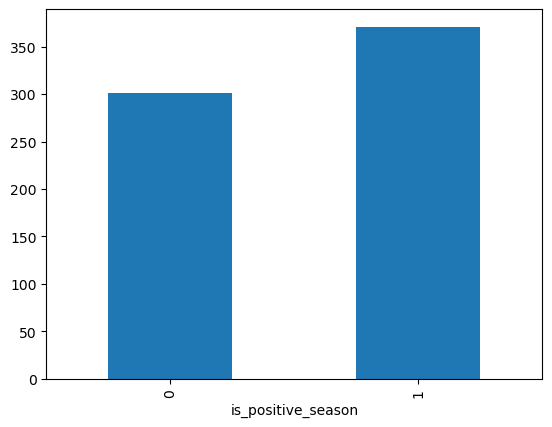

In [79]:
stats_df.groupby('is_positive_season').size().plot(kind = 'bar')

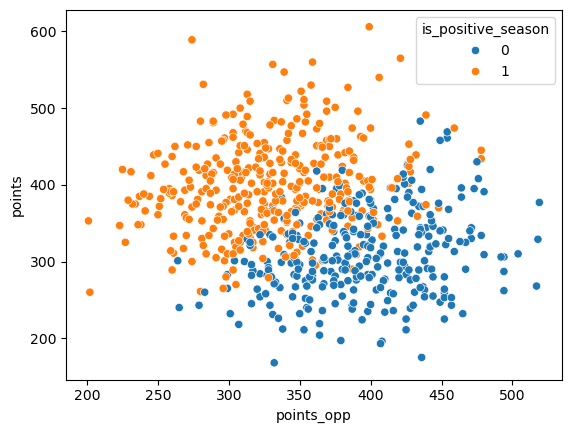

In [96]:
sns.scatterplot(stats_df, x='points_opp', y='points', hue = "is_positive_season")
plt.show()

<Axes: xlabel='wins', ylabel='losses'>

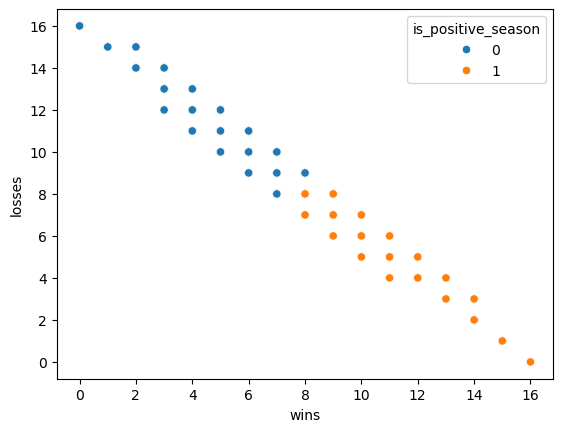

In [502]:
sns.scatterplot(stats_df, x='wins', y='losses', hue = "is_positive_season")

<Axes: xlabel='score_pct', ylabel='turnover_pct'>

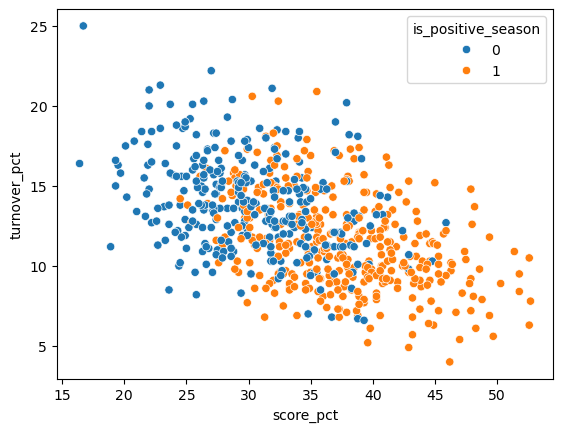

In [114]:
sns.scatterplot(stats_df, x='score_pct', y='turnover_pct', hue = "is_positive_season")

In [420]:
#creating x and y based on the independent value(is_positive_season)
X = stats_df.drop(columns = ['is_positive_season', 'win_loss_perc', 'losses', 'wins'])
y = stats_df['is_positive_season']

In [476]:
#splitting data into training and testing 70/30
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3) 

In [456]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (604, 28)
X_test (68, 28)
y_train (604,)
y_test (68,)


In [458]:
stats_tree = tree.DecisionTreeClassifier()

In [478]:
stats_tree = stats_tree.fit(X_train, y_train)

In [480]:
predicted = stats_tree.predict(X_test)
predicted

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0], dtype=int64)

In [536]:
#accuracy score
metrics.accuracy_score(y_test, predicted)

0.8564356435643564

In [500]:
#classification report
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84        91
           1       0.85      0.89      0.87       111

    accuracy                           0.86       202
   macro avg       0.86      0.85      0.85       202
weighted avg       0.86      0.86      0.86       202



In [528]:
#confusion matrix
print(metrics.confusion_matrix(y_test, predicted))

[[74 17]
 [12 99]]


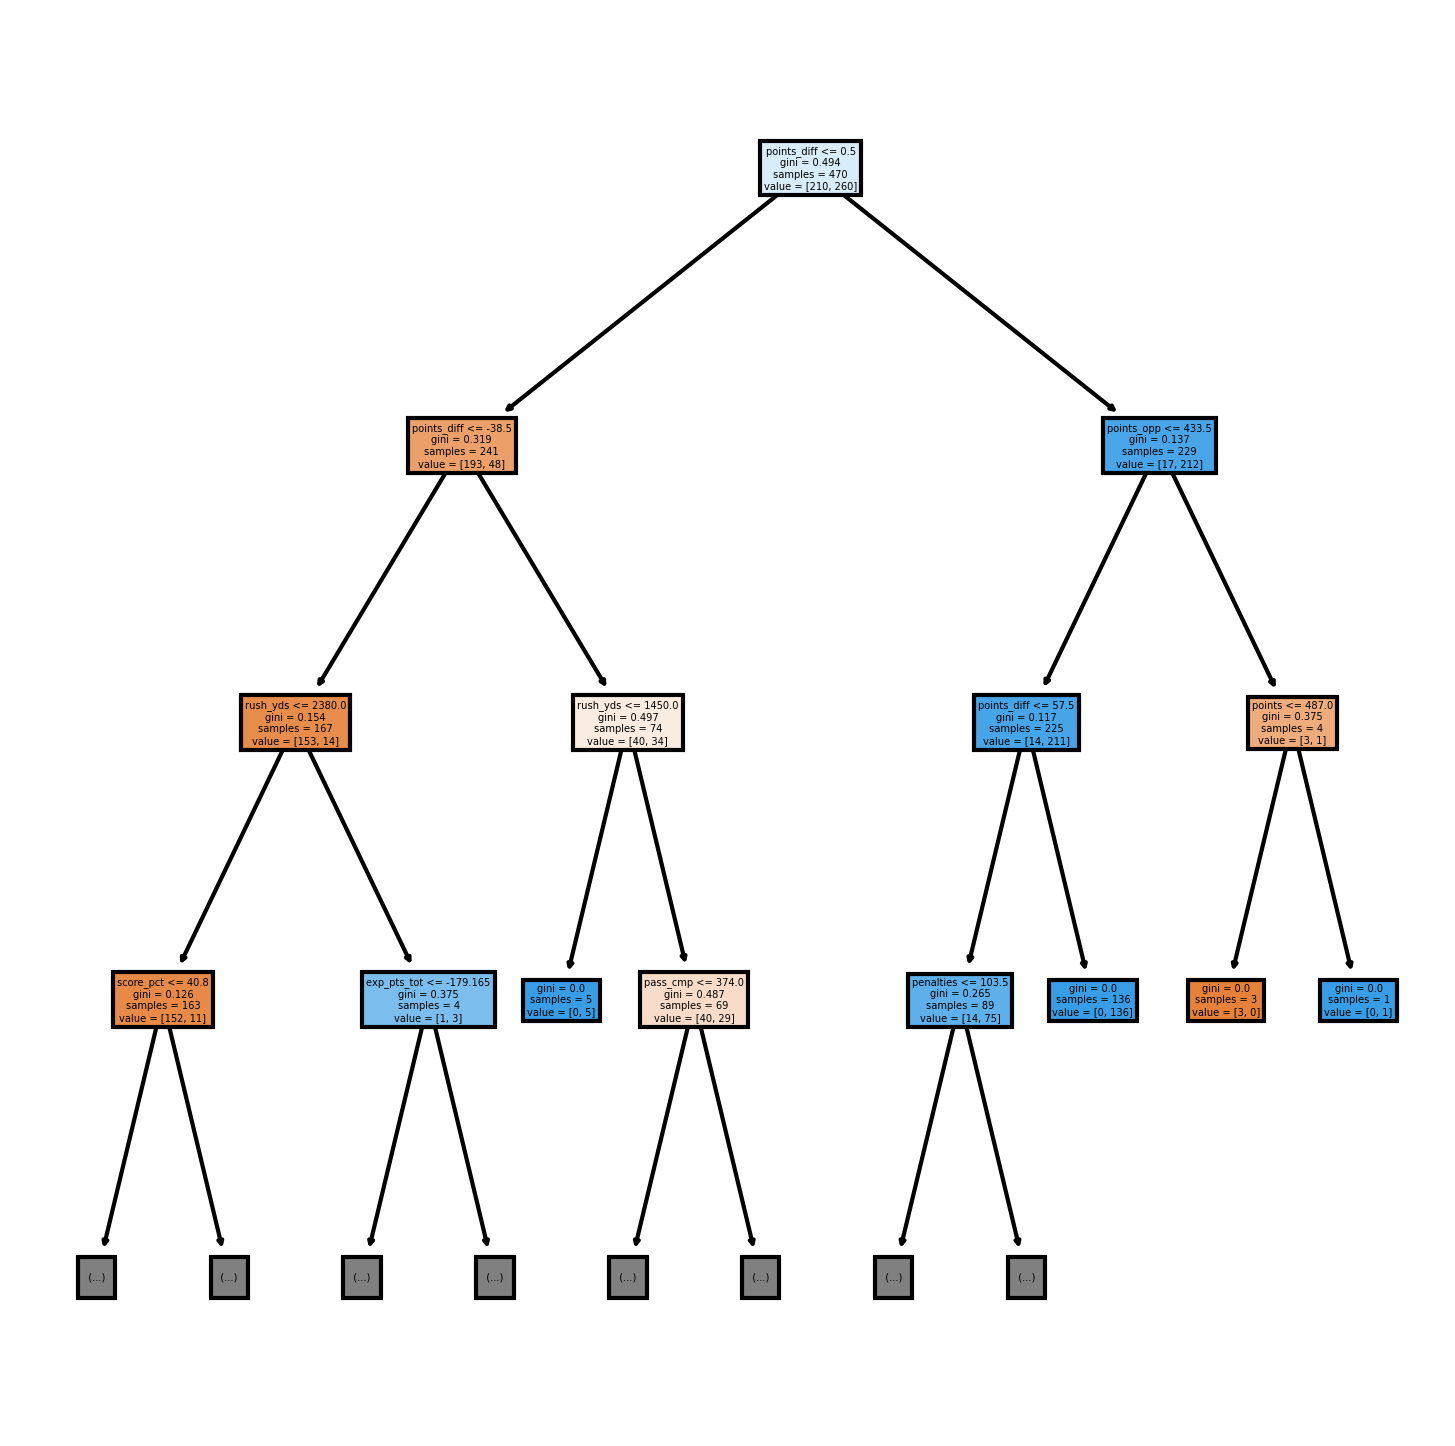

In [484]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (6,6), dpi=300)
tree.plot_tree(stats_tree, max_depth = 3, feature_names = X.columns, filled=True)
plt.show()